PREPROCESS IMAGES AND GENERATE IMAGES WITH RANDOM BRIGHTNESS FOR MORE ROBUSTNESS

In [0]:
import cv2
import matplotlib.pyplot as plt
import glob

from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

#img = cv2.imread("/Meine Ablage/Colab Notebooks/raw/raw/links/20190828-093312.jpg")
#crop_img = img[0:100, 0:100]
#cv2.imshow("cropped", crop_img)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
'Colab Notebooks'     Roadmap_EN.xml	    Roadmap.xml
 ML_Boardflip.ipynb   Roadmap_Text_EN.csv


1.3


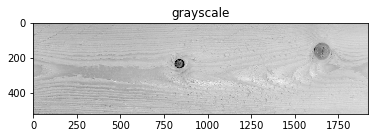

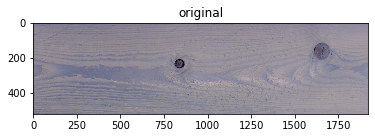

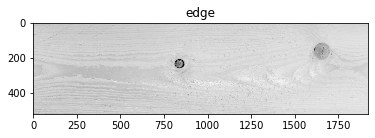

In [0]:
import numpy as np
import random

random.seed()
rnd = random.randint(5,15)
print(rnd/10)

def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
 
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

# 1024 pixels by 1024 pixels suggested maximum.

img = cv2.imread("/content/drive/My Drive/Colab Notebooks/raw/raw/links/20190828-095622.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite("/content/drive/My Drive/Colab Notebooks/test_out.jpg", gray )
plt.imshow(gray, cmap = plt.cm.gray), plt.title("grayscale")
plt.show()
plt.imshow(img), plt.title("original")
plt.show()

contrast = adjust_gamma(gray, 1.5)
plt.imshow(contrast, cmap = plt.cm.gray), plt.title("edge")
plt.show()

In [0]:
!pip install pyyaml

In [0]:
import random
import pathlib
import yaml

random.seed()


in_path = "/content/drive/My Drive/Colab Notebooks/Images/BD_RAW_2019_12_04/"
out_path = "/content/drive/My Drive/Colab Notebooks/Images/BD_PRE_2019_12_04/"
config_file = "/content/drive/My Drive/Colab Notebooks/config.yml"


# function for setting contrast
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
  
  # apply gamma correction using the lookup table
	return cv2.LUT(image, table)
  
def add_index(file, index):
  return file[:-4] + str(index) + file[-4:]


in_folder = pathlib.Path(in_path)
for item in in_folder.iterdir():
  out_folder = str(item).replace(in_path, out_path) + "/"
  print(out_folder)
  out = pathlib.Path(out_folder)
  out.mkdir(parents=True, exist_ok=True)


data_root = pathlib.Path(in_path)
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]

# load config
f = open(config_file, "r")
content = f.read()
cfg = yaml.load(content)


for in_file in all_image_paths:
  print(in_file)
  img = cv2.imread(in_file)

  rows, cols= img.shape[:2]
  rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2),(cfg['rotate']), 1)
  rotation = cv2.warpAffine(img, rotation_matrix, (cols, rows))
  cropped_color = rotation[(cfg['crop']['y1']):(cfg['crop']['y2']),(cfg['crop']['x1']): (cfg['crop']['x2'])]

  gray_img = cv2.cvtColor(cropped_color, cv2.COLOR_BGR2GRAY)

  #plt.imshow(gray_img, cmap = plt.cm.gray), plt.title("grayscale")
  #plt.show()
 
  # write gray file
  out_file = in_file.replace(in_path, out_path)
  cv2.imwrite(out_file, gray_img )
  
  # write random image 1
  alpha_int = random.randint(5,9)
  alpha = alpha_int / 10
  random_img = adjust_gamma(gray_img, alpha)
  cv2.imwrite(add_index(out_file, alpha_int), random_img)
  
  # write random image 2
  alpha_int = random.randint(11,15)
  alpha = alpha_int / 10
  random_img = adjust_gamma(gray_img, alpha)
  cv2.imwrite(add_index(out_file, alpha_int), random_img)


  # write random image 3
  alpha_int = random.randint(16,20)
  alpha = alpha_int / 10
  random_img = adjust_gamma(gray_img, alpha)
  cv2.imwrite(add_index(out_file, alpha_int), random_img)
  
  print(in_file)
  
print("Finished")
  


/content/drive/My Drive/Colab Notebooks/Images/BD_PRE_2019_12_04/rechts/
/content/drive/My Drive/Colab Notebooks/Images/BD_PRE_2019_12_04/links/
/content/drive/My Drive/Colab Notebooks/Images/BD_RAW_2019_12_04/rechts/20191120-101921_94_6.jpg
/content/drive/My Drive/Colab Notebooks/Images/BD_RAW_2019_12_04/rechts/20191120-101921_94_6.jpg
/content/drive/My Drive/Colab Notebooks/Images/BD_RAW_2019_12_04/rechts/20191125-162417_71_29.jpg
/content/drive/My Drive/Colab Notebooks/Images/BD_RAW_2019_12_04/rechts/20191125-162417_71_29.jpg
/content/drive/My Drive/Colab Notebooks/Images/BD_RAW_2019_12_04/rechts/20191125-142357_65_35.jpg
/content/drive/My Drive/Colab Notebooks/Images/BD_RAW_2019_12_04/rechts/20191125-142357_65_35.jpg
/content/drive/My Drive/Colab Notebooks/Images/BD_RAW_2019_12_04/rechts/20191125-142838_95_5.jpg
/content/drive/My Drive/Colab Notebooks/Images/BD_RAW_2019_12_04/rechts/20191125-142838_95_5.jpg
/content/drive/My Drive/Colab Notebooks/Images/BD_RAW_2019_12_04/rechts/201